# Biopython

Večina primerov je povzetih iz [tutoriala o Biopythonu](http://biopython.org/DIST/docs/tutorial/Tutorial.html).

Biopython nudi vse glavne funkcije, ki jih potrebuje bioinformatik:

* [Branje in pisanje datotek (FASTA, FASTQ, GENBANK)](http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc47)
* [Poravnava zaporedij](http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc69)
* [Uporaba programa BLAST](http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc87)
* [Dostop do zbirke NCBI](http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc111)
* [Dostop do zbirke Swiss-Prot in ExPASy](http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc137)
* [Delo s 3D strukturami PDB](http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc149)
* [Filogenetika](http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc198)
* [Analiza kratkih zaporedij - motivov](http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc211)
* [Gručenje](http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc231)
* [Nekaj nadzorovanega strojnega učenja](http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc241)
* [Izris genomskih diagramov](http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc254)
* [Dostop do zbirke KEGG](http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc272)

V vajah se bomo osredotočili na:

* [Delo z datotekami](#Delo-z-datotekami)
* [Dostop do NCBI](21 NCBI.ipynb)
* [Izris genomskih diagramov](22 Diagrami.ipynb)
* [Filogenetsko analizo](23 Filogenetske.ipynb)

Naprej uvozimo modul Biopython.

In [1]:
import Bio

## Delo z datotekami

Razred `SeqIO` omogoča delo z datotekami.

In [2]:
from Bio import SeqIO

Funkcija `SeqIO.parse` poskrbi za pravilno branje zapisov v datotekah. Seveda, če ji namignemo za kateri format gre.

In [3]:
for rec in SeqIO.parse('datoteke/primer.fasta', 'fasta'):
    print(rec.id)
    print(repr(rec.seq))
    print(len(rec))

zap1
Seq('TGGCGTCTTTTGTTGTCGAACAAATTGATCGTGAGAGATA', SingleLetterAlphabet())
40
zap2
Seq('AATGCCAACACCAAGTAAGTAAAGACAGCCTCACTAAGCTGGAAATTTCGTGGA...ATT', SingleLetterAlphabet())
500


Zgornji primer bo vrnil izjemo, ker datoteka `primer.fasta` ne obstaja.

Lahko pa jo naredimo z uporabo funkcije `SeqIO.write`:

In [4]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Alphabet import generic_nucleotide

In [5]:
import random

zap1 = ''.join([random.choice(['A', 'T', 'C', 'G']) for _ in range(40)])
rec1 = SeqRecord(Seq(zap1, generic_nucleotide),
                 id='zap1',
                 description='nakljucno',
                )

zap2 = ''.join([random.choice(['A', 'T', 'C', 'G']) for _ in range(500)])
rec2 = SeqRecord(Seq(zap2, generic_nucleotide),
                 id='zap2',
                 description='tudi nakljucno',
                )

SeqIO.write([rec1, rec2], 'primer.fasta', 'fasta')

2

Zdaj lahko poskusimo prebrati datoteko `primer.fasta`:

In [6]:
for rec in SeqIO.parse('primer.fasta', 'fasta'):
    print(rec.id)
    print(rec.description)
    print(repr(rec.seq))
    print(len(rec))

zap1
zap1 nakljucno
Seq('CATCGTACTGGAGATCTGTCAGGCGCTAATTAACTCTGTA', SingleLetterAlphabet())
40
zap2
zap2 tudi nakljucno
Seq('CTGACAGCTACCGCGTTGACCGGAACCCGAGTGATTCCAGTTGGCTACAGCTGA...GCT', SingleLetterAlphabet())
500


Kot smo videli že pri ustvarjanju objektov `SeqRecord`, vsak zapis vsebuje ID, kratek opis (ki vključuje tudi ID) in zaporedje.

Objekti tipa `SeqRecord` se obnašajo podobno kot nizi. Omogočajo indeksiranje, rezanje, itd:

In [7]:
rec

SeqRecord(seq=Seq('CTGACAGCTACCGCGTTGACCGGAACCCGAGTGATTCCAGTTGGCTACAGCTGA...GCT', SingleLetterAlphabet()), id='zap2', name='zap2', description='zap2 tudi nakljucno', dbxrefs=[])

In [8]:
rec[2]

'G'

In [9]:
rec[2:7]

SeqRecord(seq=Seq('GACAG', SingleLetterAlphabet()), id='zap2', name='zap2', description='zap2 tudi nakljucno', dbxrefs=[])

In [10]:
rec[2:7].seq

Seq('GACAG', SingleLetterAlphabet())

In [11]:
str(rec[2:7].seq)

'GACAG'

In [12]:
rec[2:7] + rec[8:10]

SeqRecord(seq=Seq('GACAGTA', SingleLetterAlphabet()), id='zap2', name='zap2', description='zap2 tudi nakljucno', dbxrefs=[])

### <font color="green"><b>Vaja</b></font>

Napiši zanko, ki bo prebrala datoteko in izpisala frekvence posameznih nukleotidov:

In [13]:
cn = {}

for rec in SeqIO.parse('primer.fasta', 'fasta'):
    for n in rec.seq:
        cn[n] = cn.get(n, 0) + 1

for n, c in cn.items():
    print('{:}: {:} ({:.2f}%)'.format(n, c, c*100/sum(cn.values())))

C: 131 (24.26%)
A: 146 (27.04%)
T: 122 (22.59%)
G: 141 (26.11%)


### <font color="green"><b>Vaja</b></font>

Napiši zanko, ki bo za dano zaporedje `s` izrisala frekvenco nukleotidov v oknih dolžine `k`.

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

def plotAT(s, k):
    cns = []
    for i in range(len(s)-k):
        cns.append(s[i:i+k].count('A')+s[i:i+k].count('T'))
    plt.plot(cns)
    return cns

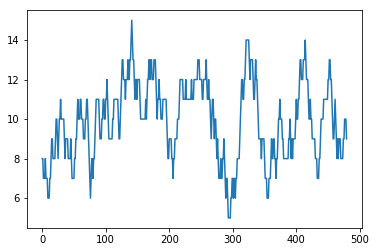

In [15]:
plotAT(rec.seq, 20);

### <font color="green"><b>Vaja</b></font>

Napiši zanko, ki bo za dano zaporedje `s` izrisala frekvenco dinukleotidov CpG v oknih dolžine `k`.

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

def plotCG(s, k):
    s = str(s)
    cns = []
    for i in range(len(s)-k):
        cns.append(s[i:i+k].count('CG')+s[i:i+k].count('GC'))
    plt.plot(cns)
    return cns

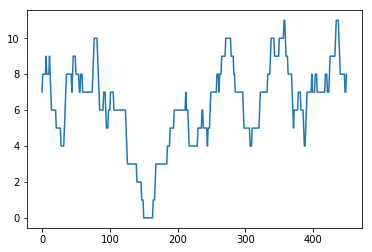

In [17]:
plotCG(rec.seq, 50);

### Branje datotek iz spleta

Seveda Python omogoča branje datotek iz spleta. Preberimo datoteko iz zbirke [ENA](http://www.ebi.ac.uk/ena) na naslovu: [ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR020/SRR020192/SRR020192.fastq.gz](ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR020/SRR020192/SRR020192.fastq.gz)

Ker bomo tokrat brali datoteko FASTQ, moramo to eksplicitno navesti funkciji `SeqIO.parse`:

In [18]:
import urllib
import gzip

f = gzip.open(urllib.request.urlopen('ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR020/SRR020192/SRR020192.fastq.gz'), 'rt')

for rec in list(SeqIO.parse(f, 'fastq'))[:3]:
    print(rec.id)
    print(repr(rec.seq))
    print(rec.letter_annotations["phred_quality"])
    print(len(rec))

SRR020192.1
Seq('GATGACGGTGTCTACATTGTTCCCGACCACTCATCTCCTCTGTCATGCCCGAAA...CGT', SingleLetterAlphabet())
[24, 23, 27, 30, 30, 30, 23, 23, 24, 23, 23, 30, 28, 27, 25, 25, 27, 27, 27, 22, 22, 24, 18, 18, 18, 30, 19, 19, 23, 23, 30, 30, 32, 32, 32, 30, 24, 23, 23, 27, 30, 32, 30, 32, 29, 28, 28, 17, 17, 17, 17, 24, 17, 17, 13, 15, 17, 25, 25, 24, 24, 23, 27, 27, 15, 15, 15, 15, 15, 17, 17, 11, 15, 15]
74
SRR020192.2
Seq('GATGACGGTGTCTACATCGTTCCACCACTCATCTCCTCTGTCATGCCCGAAAGT...CCC', SingleLetterAlphabet())
[27, 27, 27, 30, 30, 30, 23, 23, 24, 27, 27, 30, 28, 27, 27, 27, 27, 30, 30, 27, 27, 27, 27, 30, 23, 23, 23, 23, 30, 30, 32, 32, 30, 30, 27, 27, 27, 27, 30, 29, 28, 29, 29, 29, 29, 17, 15, 15, 15, 15, 15, 15, 15, 17, 26, 15, 15, 15, 15, 27, 27, 15, 15, 15, 15, 15]
66
SRR020192.3
Seq('GACGACGGTGTCTACATCGTTCCACCACTCATCTCCTCTGTCATGCCCAAAGTC...CGT', SingleLetterAlphabet())
[32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40,

V zgornjem primeru opazite, da se poleg zaporedja zdaj izpisuje podatek o kvaliteti sekvenciranja posameznega nukleotida, t.i. ocena [PHRED](https://en.wikipedia.org/wiki/Phred_quality_score), ki je sestavni del formata [FASTQ](https://en.wikipedia.org/wiki/FASTQ_format).

### <font color="green"><b>Vaja</b></font>

Napiši funkcijo `trim_low_quality_tail(rec, phred_th)`, ki na koncu zaporedja `rec` zbriše vse poziciji z nizko kvaliteto (pod pragom `phred_th`).

In [19]:
def trim_low_quality_tail(rec, phred_th):
    quals = rec.letter_annotations["phred_quality"]
    while quals and quals[-1] < phred_th:
        quals = quals[:-1]
    rec = rec[:len(quals)]
    return rec

In [20]:
len(rec)

111

In [21]:
trimmed = trim_low_quality_tail(rec, 25)

In [22]:
len(trimmed)

85